# Time for spatial stuff!


In [58]:
import geopandas as gdp
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
municipalities = gdp.read_file(r"C:\Users\Admin\Dropbox\3. AAU\PhD course\SDS2020\Repo\notebooks\wed25\Shapefiles\KOMMUNE.shp")
municipalities.head()

,FEAT_ID,FEAT_KODE,FEAT_TYPE,FEAT_STTXT,GEOM_STTXT,DAGI_ID,AREAL,REGIONKODE,REGIONNAVN,GYLDIG_FRA,...,DQ_DESCR,DQ_PROCESS,DQ_RESPONS,DQ_POSACPL,DQ_POSACLV,TIMEOF_CRE,TIMEOF_PUB,TIMEOF_REV,TIMEOF_EXP,geometry
0,149673,6310,Kommune,vedtaget,endelig,389146,24010.29,1085,Region Sjælland,2019-01-01,...,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2019-01-01,2019-01-07,None,2020-11-07,"POLYGON Z ((675926.480 6172129.210 -999.000, 6..."
1,149674,6310,Kommune,vedtaget,endelig,389146,24010.29,1085,Region Sjælland,2019-01-01,...,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2019-01-01,2019-01-07,None,2020-11-07,"POLYGON Z ((687523.890 6176458.950 -999.000, 6..."
2,149675,6310,Kommune,vedtaget,endelig,389146,24010.29,1085,Region Sjælland,2019-01-01,...,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2019-01-01,2019-01-07,None,2020-11-07,"POLYGON Z ((689361.510 6173523.720 -999.000, 6..."
3,149676,6310,Kommune,vedtaget,endelig,389146,24010.29,1085,Region Sjælland,2019-01-01,...,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2019-01-01,2019-01-07,None,2020-11-07,"POLYGON Z ((689210.210 6174589.210 -999.000, 6..."
4,149647,6310,Kommune,vedtaget,endelig,389130,25096.56,1084,Region Hovedstaden,2018-01-22,...,Manuelt indtegnet pba. FOT/matriklen,SDFE,Social- og Indenrigsministeriet,1,None,2018-01-22,2018-01-22,None,2020-11-07,"POLYGON Z ((679613.660 6187623.990 -999.000, 6..."


In [30]:
mun_data=pd.read_excel(r"C:\Users\Admin\Dropbox\3. AAU\PhD course\SDS2020\Repo\datasets\spatialdata.xlsx")
mun_data.head()

,omr,alt2016,psyk2016,psykratio
0,København,64735,1326,0.020484
1,Frederiksberg,12364,258,0.020867
2,Dragør,1746,54,0.030928
3,Tårnby,5614,158,0.028144
4,Albertslund,3686,76,0.020619


In [31]:
print(municipalities.columns)

Index(['FEAT_ID', 'FEAT_KODE', 'FEAT_TYPE', 'FEAT_STTXT', 'GEOM_STTXT',
       'DAGI_ID', 'AREAL', 'REGIONKODE', 'REGIONNAVN', 'GYLDIG_FRA',
       'GYLDIG_TIL', 'KOMKODE', 'KOMNAVN', 'DQ_SPECIFK', 'DQ_STATEM',
       'DQ_DESCR', 'DQ_PROCESS', 'DQ_RESPONS', 'DQ_POSACPL', 'DQ_POSACLV',
       'TIMEOF_CRE', 'TIMEOF_PUB', 'TIMEOF_REV', 'TIMEOF_EXP', 'geometry'],
      dtype='object')


In [32]:
municipalities.info(verbose=False)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1575 entries, 0 to 1574
Columns: 25 entries, FEAT_ID to geometry
dtypes: float64(1), geometry(1), int64(3), object(20)
memory usage: 307.7+ KB


In [33]:
print(municipalities.loc[1:50, ['KOMNAVN']])

          KOMNAVN
1           Lejre
2           Lejre
3           Lejre
4   Frederikssund
5   Frederikssund
6      Fredericia
7      Fredericia
8      Fredericia
9          Lemvig
10         Lemvig
11   Guldborgsund
12       Slagelse
13       Slagelse
14       Slagelse
15       Slagelse
16    Vordingborg
17    Vordingborg
18    Vordingborg
19    Vordingborg
20  Frederikssund
21  Frederikssund
22         Lemvig
23        Thisted
24        Thisted
25        Thisted
26        Thisted
27        Thisted
28        Thisted
29       Slagelse
30       Slagelse
31       Slagelse
32       Slagelse
33       Slagelse
34       Slagelse
35       Slagelse
36       Slagelse
37    Vordingborg
38    Vordingborg
39    Vordingborg
40  Frederikssund
41  Frederikssund
42  Frederikssund
43        Thisted
44         Lemvig
45    Christiansø
46    Christiansø
47       Slagelse
48       Slagelse
49       Slagelse
50       Slagelse


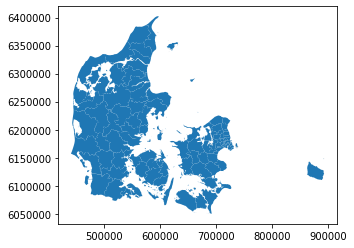

In [34]:
municipalities.plot()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1575 entries, 0 to 1574
Columns: 25 entries, FEAT_ID to geometry
dtypes: float64(1), geometry(1), int64(3), object(20)
memory usage: 307.7+ KB


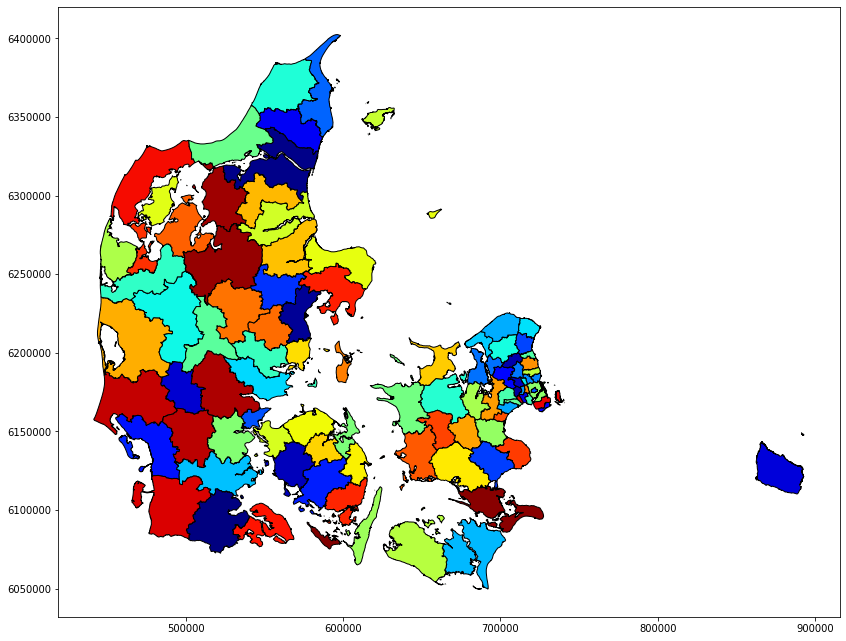

In [41]:
municipalities.plot(cmap='jet', edgecolor='black', column='KOMNAVN', figsize=(14,14))

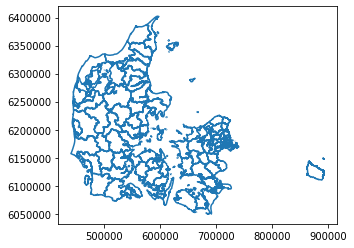

In [47]:
municipalities.boundary.plot()

In [21]:
mun = municipalities.dissolve(by='KOMNAVN')

In [23]:
mun.info(verbose=False)

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 99 entries, Aabenraa to Ærø
Columns: 24 entries, geometry to TIMEOF_EXP
dtypes: float64(1), geometry(1), int64(3), object(19)
memory usage: 21.8+ KB


In [43]:
mun_fun = mun.merge(mun_data, left_on='KOMNAVN', right_on="omr", how='left', validate="one_to_one")
mun_fun.head()

,geometry,FEAT_ID,FEAT_KODE,FEAT_TYPE,FEAT_STTXT,GEOM_STTXT,DAGI_ID,AREAL,REGIONKODE,REGIONNAVN,...,DQ_POSACPL,DQ_POSACLV,TIMEOF_CRE,TIMEOF_PUB,TIMEOF_REV,TIMEOF_EXP,omr,alt2016,psyk2016,psykratio
0,MULTIPOLYGON Z (((532611.300 6079233.260 -999....,91071,6310,Kommune,vedtaget,endelig,389169,94061.45,1083,Region Syddanmark,...,1,None,2020-06-09,2020-06-09,None,2020-11-07,Aabenraa,7016.0,109.0,0.015536
1,MULTIPOLYGON Z (((577131.740 6306752.540 -999....,149920,6310,Kommune,vedtaget,endelig,389206,113800.07,1081,Region Nordjylland,...,1,None,2018-11-07,2018-11-07,None,2020-11-07,Aalborg,18343.0,340.0,0.018536
2,MULTIPOLYGON Z (((580132.510 6230146.780 -999....,150803,6310,Kommune,vedtaget,endelig,389194,47115.23,1082,Region Midtjylland,...,1,None,2018-06-28,2018-06-28,None,2020-11-07,Aarhus,28614.0,472.0,0.016495
3,"POLYGON Z ((711377.280 6178342.550 -999.000, 7...",108994,6310,Kommune,vedtaget,endelig,389112,2343.66,1084,Region Hovedstaden,...,1,None,2020-08-27,2020-08-27,None,2020-11-07,Albertslund,3686.0,76.0,0.020619
4,"POLYGON Z ((701094.650 6192181.200 -999.000, 7...",151461,6310,Kommune,vedtaget,endelig,389121,6742.52,1084,Region Hovedstaden,...,1,None,2018-01-22,2018-01-22,None,2020-11-07,Allerød,2902.0,27.0,0.009304


C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


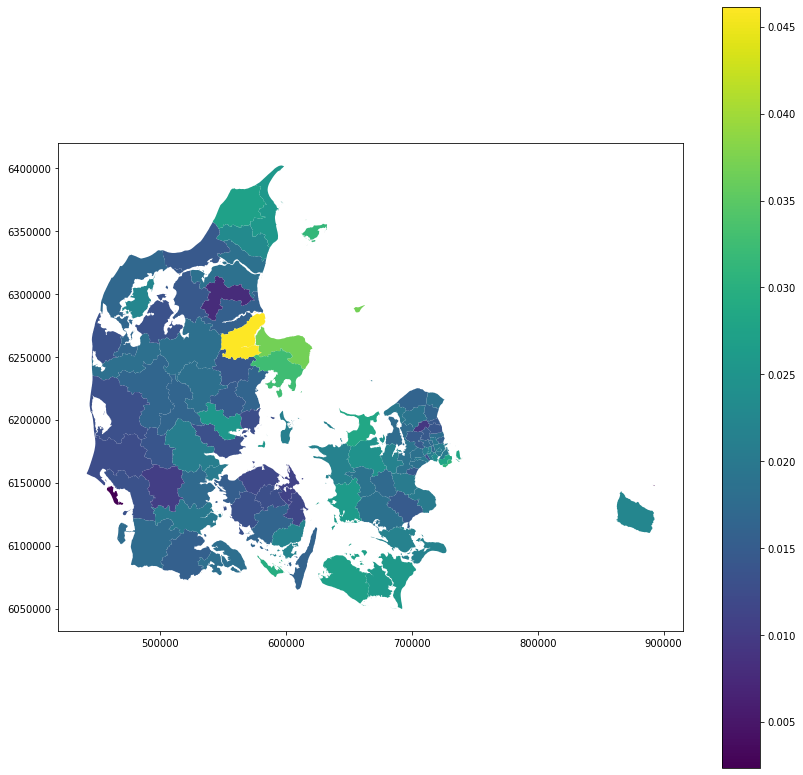

In [46]:
mun_fun.plot(column="psykratio", legend="True", figsize=(14,14))

In [48]:
rute=gdp.read_file(r"C:\Users\Admin\Dropbox\3. AAU\PhD course\SDS2020\Repo\notebooks\wed25\Shapefiles\Marguerit_2016_UTM32_euref89.shp")

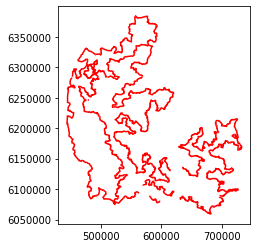

In [52]:
rute.plot(color="r")

C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


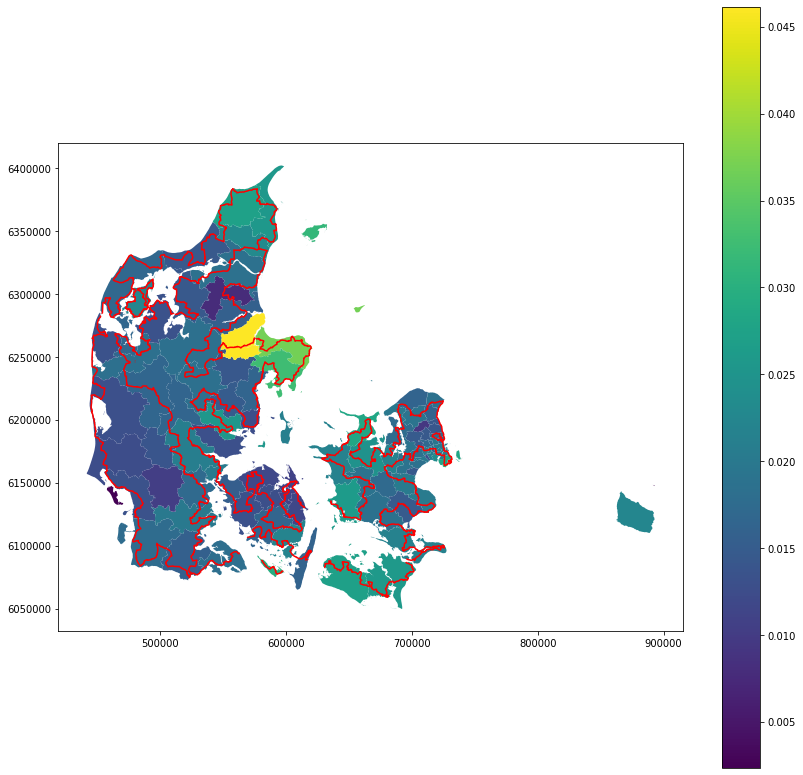

In [66]:
fig, ax =plt.subplots(1,1, figsize=(14,14))
mun_fun.plot(column="psykratio", ax=ax, legend=True)
rute.plot(ax=ax, color="red")